In [219]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:\\Users\\kr_student2\\Desktop\\image"
categories = ["Beagle", "bulldog", "corgi", "Greyhound","Husky","Maltese","Pomeranian","Toypoodle"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):  #리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능을 가집니다.
    #첫시작 0번째 Beagle
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    #1 0 0 0 0 0 0 0
    
    image_dir = caltech_dir + "/" + cat   #"C:\\Users\\kr_student2\\Desktop\\image\\Beagle"
    files = glob.glob(image_dir+"/*.jpg") #glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다.
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)
        #700번째 과정 출력

X = np.array(X)
y = np.array(y)
#NumPy의 array라는 함수에 리스트를 넣으면 배열로 변환해 준다.
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
#훈련/테스트 나눔 테스트 사이즈 기본은 0.25
xy = (X_train, X_test, y_train, y_test)
np.save("C:\\Users\\kr_student2\\Desktop\\image\\dog_specices_image_data.npy", xy)

print("ok", len(y))

Beagle  파일 길이 :  146
Beagle  :  C:\Users\kr_student2\Desktop\image/Beagle\Beagle0.jpg
bulldog  파일 길이 :  427
bulldog  :  C:\Users\kr_student2\Desktop\image/bulldog\bulldog0.jpg
corgi  파일 길이 :  415
corgi  :  C:\Users\kr_student2\Desktop\image/corgi\corgi0.jpg
Greyhound  파일 길이 :  94
Greyhound  :  C:\Users\kr_student2\Desktop\image/Greyhound\Greyhound0.jpg
Husky  파일 길이 :  429
Husky  :  C:\Users\kr_student2\Desktop\image/Husky\Husky0.jpg
Maltese  파일 길이 :  500
Maltese  :  C:\Users\kr_student2\Desktop\image/Maltese\Maltese0.jpg
Pomeranian  파일 길이 :  416
Pomeranian  :  C:\Users\kr_student2\Desktop\image/Pomeranian\Pomeranian0.jpg
Toypoodle  파일 길이 :  407
Toypoodle  :  C:\Users\kr_student2\Desktop\image/Toypoodle\Toypoodle0.jpg
ok 2834


In [229]:
nb_classes

8

In [220]:
import os
import numpy as np
img_dir = "C:\\Users\\kr_student2\\Desktop\\image"
categories = os.listdir(img_dir)
nb_calsses = len(categories)
X_train, x_test, y_train, y_test = np.load('C:\\Users\\kr_student2\\Desktop\\image\\dog_specices_image_data.npy', allow_pickle = True)

In [230]:
print(X_train.shape)
print(y_train[1])
print(X_test.shape)

(2125, 64, 64, 3)
[0 0 1 0 0 0 0 0]
(709, 64, 64, 3)


In [222]:
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
#첫번째 인자 : 컨볼루션 필터의 수 입니다.
#두번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
#padding : 경계 처리 방법을 정의합니다.
#‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
#input_shape : 샘플 수를 제외한 입력 형태를 정의 합니다. 모델에서 첫 레이어일 때만 정의하면 됩니다.
#(행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
#코를 볼 때는 코 주변만 보고, 눈을 볼 때는 눈 주변만 보면서 학습 및 인식하는 것입니다.
model.add(MaxPooling2D(pool_size=(2,2)))
#컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만듭니다. 이것은 지역적인 사소한 변화가 영향을 미치지 않도록 합니다.
model.add(Dropout(0.25))
#드롭아웃이란 인공 신경망의 뉴런을 확률적으로 사용하지 않음으로써 과적합을 방지하는 기법이다.

model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 합니다. 
#이 때 사용되는 것이 플래튼 레이어입니다.
model.add((Dense(256, activation='relu')))
model.add(Dropout(0.25))
model.add(Dense(nb_classes, activation='softmax'))
model_dir = 'C:\\Users\\kr_student2\\Desktop\\image'
    
model_path = model_dir + '\\dog_model'    
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint 콜백 함수는 Keras에서 모델을 학습할 때마다 중간중간에 콜백 형태로 알려줍니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
#반복문을 돌면서 최고 성능의 모델을 찾아낼 때, 초반에 최고 성능의 모델이 찾아져서 그 보다 더 좋은 성능의 모델이 더 이상 발견되지 않는 경우가 있습니다. 
#이런 경우 학습을 중단하도록 하는 기능을 Keras에서는 EarlyStopping()이라는 함수로 제공하고 있습니다.

In [226]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)     

In [227]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [228]:
#데이터셋이 적어서 validation을 그냥 test 데이터로 진행. 
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
67/67 [==============================] - ETA: 0s - loss: 2.1310 - accuracy: 0.1779
Epoch 00001: val_loss improved from inf to 2.01430, saving model to C:\Users\kr_student2\Desktop\image\dog_model
INFO:tensorflow:Assets written to: C:\Users\kr_student2\Desktop\image\dog_model\assets
67/67 [==============================] - 217s 3s/step - loss: 2.1310 - accuracy: 0.1779 - val_loss: 2.0143 - val_accuracy: 0.1580
Epoch 2/50
67/67 [==============================] - ETA: 0s - loss: 1.9362 - accuracy: 0.2146
Epoch 00002: val_loss improved from 2.01430 to 1.87302, saving model to C:\Users\kr_student2\Desktop\image\dog_model
INFO:tensorflow:Assets written to: C:\Users\kr_student2\Desktop\image\dog_model\assets
67/67 [==============================] - 240s 4s/step - loss: 1.9362 - accuracy: 0.2146 - val_loss: 1.8730 - val_accuracy: 0.2934
Epoch 3/50
67/67 [==============================] - ETA: 0s - loss: 1.8229 - accuracy: 0.2936
Epoch 00003: val_loss improved from 1.87302 to 1.76811

In [237]:
history.history

{'loss': [2.131016254425049,
  1.9361518621444702,
  1.8228678703308105,
  1.7260007858276367,
  1.6153010129928589,
  1.5110538005828857,
  1.390777587890625,
  1.304225206375122,
  1.1873081922531128,
  1.0404623746871948,
  0.9009524583816528,
  0.7750675082206726,
  0.6989169716835022,
  0.6708024144172668,
  0.551885724067688,
  0.4975966811180115,
  0.3974107801914215],
 'accuracy': [0.1778823584318161,
  0.2145882397890091,
  0.29364705085754395,
  0.34964704513549805,
  0.39811766147613525,
  0.43341177701950073,
  0.49176469445228577,
  0.5199999809265137,
  0.5778823494911194,
  0.6202353239059448,
  0.6795294284820557,
  0.7308235168457031,
  0.7567058801651001,
  0.7614117860794067,
  0.8004705905914307,
  0.8202353119850159,
  0.8592941164970398],
 'val_loss': [2.0142979621887207,
  1.8730155229568481,
  1.7681071758270264,
  1.7139396667480469,
  1.6190893650054932,
  1.5277576446533203,
  1.5324444770812988,
  1.4376174211502075,
  1.3843668699264526,
  1.437174439430236

In [231]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

23/23 [==============================] - 16s 681ms/step - loss: 1.6777 - accuracy: 0.5515
정확도 : 0.5515


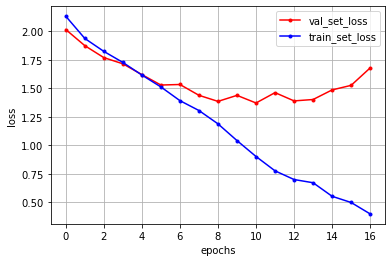

In [242]:
y_vloss = history. history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker=".", c='red',label='val_set_loss')
plt.plot(x_len, y_loss, marker=".", c='blue',label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

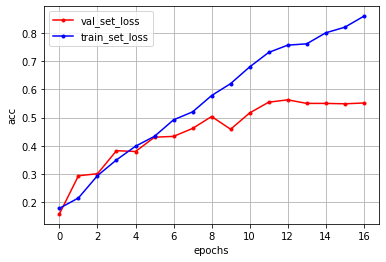

In [241]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker=".", c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker=".", c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.show()

In [246]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:\\Users\\kr_student2\\Desktop\\image\\other"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model("C:\\Users\\kr_student2\\Desktop\\image\\dog_model")

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "비글"
    elif pre_ans == 1: pre_ans_str = "불독"
    elif pre_ans == 2: pre_ans_str = "웰시코기"
    elif pre_ans == 3: pre_ans_str = "그레이하운드" 
    elif pre_ans == 4: pre_ans_str = "허스키"
    elif pre_ans == 5: pre_ans_str = "말티즈"
    elif pre_ans == 6: pre_ans_str = "포메라니안"
    else: pre_ans_str = "토이푸들"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[6] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[7] >= 0.8: print("해당 "+filenames[cnt].split("C:\\Users\\kr_student2\\Desktop\\image\\other\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

해당 그레이하운드.jfif이미지는 포메라니안로 추정됩니다.
해당 그레이하운드.jpg이미지는 허스키로 추정됩니다.
해당 말티즈.jfif이미지는 말티즈로 추정됩니다.
해당 말티즈.jpg이미지는 말티즈로 추정됩니다.
해당 불독.jfif이미지는 말티즈로 추정됩니다.
해당 불독.jpg이미지는 불독으로 추정됩니다.
해당 비글.jfif이미지는 허스키로 추정됩니다.
해당 비글.JPG이미지는 비글로 추정됩니다.
해당 웰시코기.jfif이미지는 포메라니안로 추정됩니다.
해당 웰시코기.jpg이미지는 웰시코기로 추정됩니다.
해당 토이푸들.jfif이미지는 토이푸들로 추정됩니다.
해당 토이푸들.JPG이미지는 토이푸들로 추정됩니다.
해당 포메라니안.jfif이미지는 포메라니안로 추정됩니다.
해당 포메라니안.jpg이미지는 웰시코기로 추정됩니다.
해당 허스키.jfif이미지는 허스키로 추정됩니다.
해당 허스키.jpg이미지는 허스키로 추정됩니다.
